## 1. 환자수, 입원수, ICU입원수 체크

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Patinets : SUBJECT_ID
patients = pd.read_csv('MIMIC3/PATIENTS.csv')

# 고유 환자번호는 총 46,520명
print(len(patients.SUBJECT_ID.unique()))

patients.tail()

46520


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0
46519,31844,44128,M,2098-07-25 00:00:00,NaN,NaN,NaN,0


In [3]:
# ADMISSIONS : HADM_ID
admissions = pd.read_csv('MIMIC3/ADMISSIONS.csv')

# 고유 입원수는 총 58,976번
print(len(admissions.HADM_ID.unique()))

# 고유 환자번호는 총 46,520명
# 즉 내원 환자 모두 입원을 했다. ( 내원하면 모두 입원했음 )
print(len(admissions.SUBJECT_ID.unique()))

admissions.tail()

58976
46520


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0
58975,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,CATHOLIC,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1


In [4]:
# ICUSTAYS : ICUSTAY_ID
icustays = pd.read_csv('MIMIC3/ICUSTAYS.csv')

# 고유 중환자실 입원수는 총 61,532번
print(len(icustays.ICUSTAY_ID.unique()))

# 고유 입원수는 총 57,786번     -  기존 58,976번과는 다름
# 즉,입원은 했으나 중환자실을 가지 않은 경우가 1190번 정도 됨.
print(len(icustays.HADM_ID.unique()))

# 고유 환자번호는 총 46,476명   -  기존 46,520명과는 다름
# 즉 입원은 했으나 중환자실을 가지 않은 환자는 44명 정도 됨.
print(len(icustays.SUBJECT_ID.unique()))

icustays.tail()

61532
57786
46476


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346
61531,59810,94956,156386,275346,metavision,TSICU,TSICU,14,14,2157-05-19 02:54:54,2157-05-23 14:58:04,4.5022


- 한 환자당 1.3번정도는 중환자실 입원함.
- 한 환자당 1.2번정도는 입원함.
- 두번 이상 중환자실에 입원한 환자수는 8755명 ( 한번만 중환자실 : 37721명)
- 두번 이상 입원한 환자 수는 7537명
    - 왜냐면, 한번 입원했는데 여러분 중환자실 갈수 있으므로 중환자실 환자수가 더많다.

In [5]:
count_num = icustays[['SUBJECT_ID','HADM_ID','ICUSTAY_ID']].groupby(['SUBJECT_ID']).count().value_counts()
count_num[1:].sum()

8755

In [6]:
# count_num

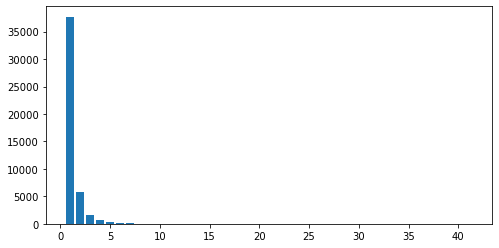

In [7]:
# 한 환자당 중환자실 몇번?
ls = [1  ,2  ,3  ,4  ,5  ,6  ,7  ,8  ,9  ,10 ,11 ,12 ,13 ,15 ,14 ,16 ,17 ,18 ,21 ,25 ,20 ,22 ,23 ,31 ,35 ,38 ,41 ]
plt.figure(figsize=(8,4))
plt.bar(ls,count_num.values)
plt.show()

In [8]:
admissions[['SUBJECT_ID','HADM_ID']].groupby(['SUBJECT_ID']).count().value_counts()[1:].sum()

7537

## 2. DRG 전체 환자에서 사용할 환자만 선별하기
- 1. DRG전체 row는 몇줄? 고유환자수 및 HADM_ID는 몇번?
- 2. first_icu만 꺼낼때, 몇줄? 몇명? (=HADM몇번?)
- 3. 최종으로, 진단기준으로 선별했을 때, 몇 줄? 몇명? (=몇번?)

In [9]:
# 1. DRG전체 row는 몇줄? 고유환자수 및 HADM_ID는 몇번?
drg = pd.read_csv('./MIMIC3/DRGCODES.csv')

# 125,557 row
print(len(drg))
# 고유환자수 : 46,511명 - 거의 대부분의 환자를 커버하고 있음.
print(len(drg.SUBJECT_ID.unique()))
# 고유 입원수 : 58,890번  - 거의 대부분의 입원을 커버하고 있음.
print(len(drg.HADM_ID.unique()))

drg.tail()

125557
46511
58890


,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
125552,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN
125553,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0
125554,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0
125555,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN
125556,123456,87879,155607,APR,6813,Other O.R. Procedures For Lymphatic/Hematopiet...,3.0,2.0


In [10]:
# 2. DRG에서 first_icu만 꺼낼때, 몇줄? 몇명? (=HADM몇번?)

# 2-1. first icu만 꺼내기
sorted_icu = icustays.sort_values(by=['INTIME'], ascending=True)
sorted_icu
drop_icu = sorted_icu.drop_duplicates(subset=['SUBJECT_ID'], keep='first')
drop_icu
# 최종적으로 46,476명의 환자 리스트 뽑아

# 2-2. first icu와 drg 머지 하기
first_icu = drop_icu[['HADM_ID','ICUSTAY_ID']]
first_icu_DRG = pd.merge(drg, first_icu, on='HADM_ID', how='left')
first_icu_DRG # 125,557 row 그대로 유지

# 2-3. first icu와 drg의 교집합 만 남기고 없애기
DRG_firstICU = first_icu_DRG[first_icu_DRG['ICUSTAY_ID'].notnull()]
DRG_firstICU # 96,138 row 됨.

# 2-4 몇줄 몇명(=몇번 입원)

# 96,138 row
print(len(DRG_firstICU))
# 46,469 명 대상으로 추려짐 ( )
print(len(DRG_firstICU.SUBJECT_ID.unique())) 
# 46,469 번 입원 대상으로 추려짐 ( )
print(len(DRG_firstICU.HADM_ID.unique())) 

DRG_firstICU = DRG_firstICU.reset_index(drop=True)
DRG_firstICU.tail()

96138
46469
46469


,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID
96133,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN,235241.0
96134,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
96135,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
96136,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN,213017.0
96137,123456,87879,155607,APR,6813,Other O.R. Procedures For Lymphatic/Hematopiet...,3.0,2.0,230219.0


In [11]:
DRG_firstICU

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN,258915.0
1,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,260176.0
2,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN,236527.0
3,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN,245993.0
4,347,23705,154221,HCFA,385,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN,211993.0
...,...,...,...,...,...,...,...,...,...
96133,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN,235241.0
96134,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
96135,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
96136,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN,213017.0


In [85]:
# 3. 최종으로, 진단기준으로 선별했을 때, 몇 줄? 몇명? (=몇번?)

'''최종 진단선별 기준
Septicemia & Disseminated Infections 
SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC 
SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                                  

Other & Unspecified Gastrointestinal Hemorrhage 
G.I. HEMORRHAGE W CC  
G.I. HEMORRHAGE W MCC  


Peptic Ulcer & Gastritis 
Other Digestive System Diagnoses
Diverticulitis & Diverticulosis

Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure       
Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure     
ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R
Respiratory System Diagnosis w/ Ventilator Support 96+ Hours
TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.   
'''

diction = {'DESCRIPTION' : ['Septicemia & Disseminated Infections',
'SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',
'SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS',                                  
'Other & Unspecified Gastrointestinal Hemorrhage',
'G.I. HEMORRHAGE W CC',
'G.I. HEMORRHAGE W MCC',
'Peptic Ulcer & Gastritis', 
'Other Digestive System Diagnoses',
'Diverticulitis & Diverticulosis',
'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure',
'Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure',     
'ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R',
'Respiratory System Diagnosis w/ Ventilator Support 96+ Hours',
'TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.'], 'label': 1}
print()

for_merge = pd.DataFrame(diction)
for_merge

,DESCRIPTION,label
0,Septicemia & Disseminated Infections,1
1,SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W...,1
2,SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,1
3,Other & Unspecified Gastrointestinal Hemorrhage,1
4,G.I. HEMORRHAGE W CC,1
5,G.I. HEMORRHAGE W MCC,1
6,Peptic Ulcer & Gastritis,1
7,Other Digestive System Diagnoses,1
8,Diverticulitis & Diverticulosis,1
9,Tracheostomy W Long Term Mechanical Ventilatio...,1


In [87]:
merged_diag = pd.merge(DRG_firstICU, for_merge, on='DESCRIPTION', how='left')
merged_diag
DRG_firstICU_DIAG = merged_diag[merged_diag['label'].notnull()]
DRG_firstICU_DIAG

# 총 row수 : 7544 개 로우
print(len(DRG_firstICU_DIAG))
# 총 환자 수 : 3474명
print(len(DRG_firstICU_DIAG.SUBJECT_ID.unique()))
# 총 입원수 수 : 3474번
print(len(DRG_firstICU_DIAG.HADM_ID.unique()))

DRG_firstICU_DIAG = DRG_firstICU_DIAG.reset_index(drop=True)
DRG_firstICU_DIAG.tail()

7544
3474
3474


,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label
7539,121724,51259,175524,MS,871,SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W...,NaN,NaN,260610.0,1.0
7540,124577,65843,197572,APR,1303,Respiratory System Diagnosis w/ Ventilator Sup...,3.0,3.0,285128.0,1.0
7541,124578,65843,197572,APR,1303,Respiratory System Diagnosis w/ Ventilator Sup...,3.0,3.0,285128.0,1.0
7542,123397,61687,106028,APR,2541,Other Digestive System Diagnoses,1.0,1.0,262191.0,1.0
7543,123398,61687,106028,APR,2541,Other Digestive System Diagnoses,1.0,1.0,262191.0,1.0


In [88]:
DRG_firstICU_DIAG.to_csv('./sungbin/DRG_firstICU_DIAG.csv', index=False)

## MV, CV에서 환자 질환 선별하기

In [14]:
import pandas as pd
drg_firstICU = pd.read_csv("./sungbin/DRG_firstICU.csv")
prbc_cv = pd.read_csv("./sungbin/prbc_in_cv_210910.csv")
prbc_mv = pd.read_csv("./sungbin/prbc_in_mv_210910.csv")

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [42]:
drg_firstICU.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID
96133,123452,71582,101422,MS,221,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,NaN,NaN,235241.0
96134,123453,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
96135,123454,46449,110075,APR,1653,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,3.0,2.0,213017.0
96136,123455,46449,110075,MS,234,CORONARY BYPASS W CARDIAC CATH W/O MCC,NaN,NaN,213017.0
96137,123456,87879,155607,APR,6813,Other O.R. Procedures For Lymphatic/Hematopiet...,3.0,2.0,230219.0


In [39]:
''' cv 과정을 살펴보면 '''
drop_dup_cv = prbc_cv.drop_duplicates(subset=['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID'])[['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID']]
drop_dup_cv= drop_dup_cv.dropna()
drop_dup_cv
cv_drg_first = pd.merge(drg_firstICU, drop_dup_cv, on=['SUBJECT_ID','HADM_ID', 'ICUSTAY_ID'], how='inner')
cv_drg_first

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID
0,347,23705,154221,HCFA,385,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN,211993.0
1,348,15787,122380,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,260844.0
2,352,26388,164437,HCFA,487,OTHER MULTIPLE SIGNIFICANT TRAUMA,NaN,NaN,286026.0
3,354,1712,182577,HCFA,483,"TRACHEOSTOMY EXCEPT FOR FACE, MOUTH, & NECK DI...",NaN,NaN,273583.0
4,360,1394,164187,HCFA,483,"TRACHEOSTOMY EXCEPT FOR FACE, MOUTH, & NECK DI...",NaN,NaN,229084.0
...,...,...,...,...,...,...,...,...,...
12518,61557,27120,180728,APR,1674,Other Cardiothoracic Procedures,4.0,4.0,252649.0
12519,61558,27120,180728,MS,228,OTHER CARDIOTHORACIC PROCEDURES W MCC,NaN,NaN,252649.0
12520,61587,30277,126529,APR,9114,Extensive Abdominal/Thoraic Procedures For Mul...,4.0,2.0,281263.0
12521,61588,30277,126529,APR,9114,Extensive Abdominal/Thoraic Procedures For Mul...,4.0,2.0,281263.0


In [51]:
print(cv_drg_first.DESCRIPTION.value_counts()[20:40])

Peptic Ulcer & Gastritis                                                                                                                                  113
CORONARY BYPASS WITHOUT CARDIAC CATHETERIZATION WITHOUT MCV DIAGNOSIS                                                                                     111
Percutaneous Cardiovascular Procedures w/ AMI                                                                                                             109
Cardiac Valve Procedures w/ Cardiac Catheterization                                                                                                       107
Major Small & Large Bowel Procedures                                                                                                                      105
Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure                                                                                   104
EXTENSIVE OPERATING ROOM PROCEDURE UNRELATED TO PRIN

'MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMPLICATIONS, COMORBIDITIES'

In [41]:
''' mv 과정을 살펴보면 '''
drop_dup_mv = prbc_mv.drop_duplicates(subset=['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID'])[['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID']]
drop_dup_mv= drop_dup_mv.dropna()
drop_dup_mv
mv_drg_first = pd.merge(drg_firstICU, drop_dup_mv, on=['SUBJECT_ID','HADM_ID', 'ICUSTAY_ID'], how='inner')
mv_drg_first

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID
0,45993,29061,189339,APR,2534,Other & Unspecified Gastrointestinal Hemorrhage,4.0,4.0,295674.0
1,45994,29061,189339,APR,2534,Other & Unspecified Gastrointestinal Hemorrhage,4.0,4.0,295674.0
2,45995,29061,189339,MS,377,G.I. HEMORRHAGE W MCC,NaN,NaN,295674.0
3,48214,28050,159085,APR,2403,Digestive Malignancy,3.0,3.0,204976.0
4,48215,28050,159085,APR,2403,Digestive Malignancy,3.0,3.0,204976.0
...,...,...,...,...,...,...,...,...,...
12289,123431,63187,132488,APR,9504,Extensive Procedure Unrelated To Principal Dia...,4.0,4.0,262028.0
12290,123432,63187,132488,MS,981,EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPA...,NaN,NaN,262028.0
12291,123447,75779,123505,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,286249.0
12292,123448,75779,123505,APR,1624,Cardiac Valve Procedures w/ Cardiac Catheteriz...,4.0,4.0,286249.0


In [47]:
mv_drg_first.DESCRIPTION.value_counts()[20:40]

Other Complications of Treatment                                 122
Percutaneous Cardiovascular Procedures w/ AMI                    119
SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC               118
Diverticulitis & Diverticulosis                                  116
Liver Transplant                                                 110
Major Pancreas, Liver & Shunt Procedures                         106
Extensive Procedure Unrelated To Principal Diagnosis             103
Major Stomach, Esophageal & Duodenal Procedures                  100
Respiratory System Diagnosis w/ Ventilator Support 96+ Hours     100
CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W MCC    100
CORONARY BYPASS W CARDIAC CATH W/O MCC                            96
Percutaneous Cardiovascular Procedures w/o AMI                    94
Multiple Significant Trauma W/O O.R. Procedure                    92
Major Thoracic & Abdominal Vascular Procedures                    92
TRACH W MV 96+ HRS OR PDX EXC FACE

In [ ]:
""" ---------------------------------------------MV--------------------------------------------- """
# 순환기 내과  -  심혈관계 질환 및 처치 환자 
'Cardiac Valve Procedures w/o Cardiac Catheterization',
'Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure',
'Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure',
'Cardiac Valve Procedures w/ Cardiac Catheterization',
'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/O CARD CATH W MCC',
'Other Vascular Procedures',
'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/O CARD CATH W CC',
'CORONARY BYPASS W/O CARDIAC CATH W/O MCC',
'Percutaneous Cardiovascular Procedures w/ AMI',
'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W MCC',
'CORONARY BYPASS W CARDIAC CATH W/O MCC',
'Percutaneous Cardiovascular Procedures w/o AMI',
'MAJOR CARDIOVASC PROCEDURES W MCC',

# 감염내과 - Septicemia(균혈증) 등 감염성 질환
'Septicemia & Disseminated Infections',
'Infectious & Parasitic Diseases Including HIV W O.R. Procedure',
'SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',
'INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC',

# 호흡기내과 질환 및 처치 환자
'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure',
'Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure',
'ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.',
'Respiratory System Diagnosis w/ Ventilator Support 96+ Hours',
'TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.',

# 소화기내과 환자 -  위장관계 : 위장관출혈  +  (위궤양, 위염 등)
'Peptic Ulcer & Gastritis',
'Other & Unspecified Gastrointestinal Hemorrhage',
'G.I. HEMORRHAGE W CC',
'Major Small & Large Bowel Procedures',
'Other Digestive System Diagnoses',
'G.I. HEMORRHAGE W MCC',
'Diverticulitis & Diverticulosis',
'Major Stomach, Esophageal & Duodenal Procedures',

""" ---------------------------------------------CV--------------------------------------------- """
# 순환기 내과  -  심혈관계 질환 및 처치 환자 
'CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROC WITHOUT CARDIAC CATHETER'
'CORONARY BYPASS WITH CARDIAC CATHETER'
'Cardiac Valve Procedures w/o Cardiac Catheterization'
'Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure'
'Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure'
'MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICATIONS, COMORBIDITIES'
'CORONARY BYPASS WITHOUT CARDIAC CATHETER'
'CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROCEDURES WITH CARDIAC CATHETER'
'CORONARY BYPASS WITHOUT CARDIAC CATHETERIZATION WITHOUT MCV DIAGNOSIS'
'Percutaneous Cardiovascular Procedures w/ AMI'
'Cardiac Valve Procedures w/ Cardiac Catheterization'
'Other Vascular Procedures'
'PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITH ACUTE MYOCARDIAL INFARCTION'
'CIRCULATORY DISORDERS WITH ACUTE MYOCARDIAL INFARCTION & MAJOR COMPLICATION, DISCHARGED ALIVE'
# 감염내과 - Septicemia(균혈증) 등 감염성 질환
'SEPTICEMIA AGE >17'
'Septicemia & Disseminated Infections'
'OPERATING ROOM PROCEDURE FOR INFECTIOUS & PARASITIC DISEASES'
# 호흡기내과 질환 및 처치 환자
'ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSES EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITH MAJOR OPERATING ROOM PROCEDURE'
'EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYNDROME, NEONATE'
'RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR SUPPORT'
'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH, AND NECK DIAGNOSES'
'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure'
'TRACHEOSTOMY EXCEPT FOR FACE, MOUTH, & NECK DIAGNOSES'
'Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure'
'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITHOUT MAJOR OPERATING ROOM PROCEDURE'
'Respiratory System Diagnosis w/ Ventilator Support 96+ Hours'
# 소화기내과 환자 -  위장관계 : 위장관출혈  +  (위궤양, 위염 등)
'GASTROINTESTINAL HEMORRHAGE WITH COMPLICATIONS, COMORBIDITIES'
'MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMPLICATIONS, COMORBIDITIES'
'Peptic Ulcer & Gastritis'
'Major Small & Large Bowel Procedures'
'Other & Unspecified Gastrointestinal Hemorrhage'
'Diverticulitis & Diverticulosis'

In [52]:
# 선별된 진단그룹만 DRG_firstICU에서 뽑아내기
diction = {
    'DESCRIPTION' : [
    # 순환기 내과  -  심혈관계 질환 및 처치 환자 
    'Cardiac Valve Procedures w/o Cardiac Catheterization',
    'Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure',
    'Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure',
    'Cardiac Valve Procedures w/ Cardiac Catheterization',
    'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/O CARD CATH W MCC',
    'Other Vascular Procedures',
    'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/O CARD CATH W CC',
    'CORONARY BYPASS W/O CARDIAC CATH W/O MCC',
    'Percutaneous Cardiovascular Procedures w/ AMI',
    'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W MCC',
    'CORONARY BYPASS W CARDIAC CATH W/O MCC',
    'Percutaneous Cardiovascular Procedures w/o AMI',
    'MAJOR CARDIOVASC PROCEDURES W MCC',

    # 감염내과 - Septicemia(균혈증) 등 감염성 질환
    'Septicemia & Disseminated Infections',
    'Infectious & Parasitic Diseases Including HIV W O.R. Procedure',
    'SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',
    'INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC',

    # 호흡기내과 질환 및 처치 환자
    'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure',
    'Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure',
    'ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.',
    'Respiratory System Diagnosis w/ Ventilator Support 96+ Hours',
    'TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.',

    # 소화기내과 환자 -  위장관계 : 위장관출혈  +  (위궤양, 위염 등)
    'Peptic Ulcer & Gastritis',
    'Other & Unspecified Gastrointestinal Hemorrhage',
    'G.I. HEMORRHAGE W CC',
    'Major Small & Large Bowel Procedures',
    'Other Digestive System Diagnoses',
    'G.I. HEMORRHAGE W MCC',
    'Diverticulitis & Diverticulosis',
    'Major Stomach, Esophageal & Duodenal Procedures',


    # 순환기 내과  -  심혈관계 질환 및 처치 환자 
    'CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROC WITHOUT CARDIAC CATHETER',
    'CORONARY BYPASS WITH CARDIAC CATHETER',
    'Cardiac Valve Procedures w/o Cardiac Catheterization',
    'Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure',
    'Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure',
    'MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICATIONS, COMORBIDITIES',
    'CORONARY BYPASS WITHOUT CARDIAC CATHETER',
    'CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROCEDURES WITH CARDIAC CATHETER',
    'CORONARY BYPASS WITHOUT CARDIAC CATHETERIZATION WITHOUT MCV DIAGNOSIS',
    'Percutaneous Cardiovascular Procedures w/ AMI',
    'Cardiac Valve Procedures w/ Cardiac Catheterization',
    'Other Vascular Procedures',
    'PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITH ACUTE MYOCARDIAL INFARCTION',
    'CIRCULATORY DISORDERS WITH ACUTE MYOCARDIAL INFARCTION & MAJOR COMPLICATION, DISCHARGED ALIVE',
    # 감염내과 - Septicemia(균혈증) 등 감염성 질환
    'SEPTICEMIA AGE >17',
    'Septicemia & Disseminated Infections',
    'OPERATING ROOM PROCEDURE FOR INFECTIOUS & PARASITIC DISEASES',
    # 호흡기내과 질환 및 처치 환자
    'ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSES EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITH MAJOR OPERATING ROOM PROCEDURE',
    'EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYNDROME, NEONATE',
    'RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR SUPPORT',
    'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH, AND NECK DIAGNOSES',
    'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure',
    'TRACHEOSTOMY EXCEPT FOR FACE, MOUTH, & NECK DIAGNOSES',
    'Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure',
    'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITHOUT MAJOR OPERATING ROOM PROCEDURE',
    'Respiratory System Diagnosis w/ Ventilator Support 96+ Hours',
    # 소화기내과 환자 -  위장관계 : 위장관출혈  +  (위궤양, 위염 등)
    'GASTROINTESTINAL HEMORRHAGE WITH COMPLICATIONS, COMORBIDITIES',
    'MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMPLICATIONS, COMORBIDITIES',
    'Peptic Ulcer & Gastritis',
    'Major Small & Large Bowel Procedures',
    'Other & Unspecified Gastrointestinal Hemorrhage',
    'Diverticulitis & Diverticulosis'], 
    'label': 1}
print()

for_merge = pd.DataFrame(diction)
for_merge

,DESCRIPTION,label
0,Cardiac Valve Procedures w/o Cardiac Catheteri...,1
1,Coronary Bypass w/o Cardiac Cath Or Percutaneo...,1
2,Coronary Bypass w/ Cardiac Cath Or Percutaneou...,1
3,Cardiac Valve Procedures w/ Cardiac Catheteriz...,1
4,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...,1
...,...,...
57,MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMP...,1
58,Peptic Ulcer & Gastritis,1
59,Major Small & Large Bowel Procedures,1
60,Other & Unspecified Gastrointestinal Hemorrhage,1


In [57]:
merged_diag= pd.merge(drg_firstICU, for_merge, on='DESCRIPTION', how='inner') # 43422개 로우
merged_diag


# 총 row수 : 43422 개 로우
print(len(merged_diag))
# 총 환자 수 : 16222명
print(len(merged_diag.SUBJECT_ID.unique()))
# 총 입원수 수 : 16222번
print(len(merged_diag.HADM_ID.unique()))

# merged_diag.to_csv('./sungbin/9_10_DRG_firstICU_DIAG_CV_MV.csv',index=False)


43422
16222
16222


In [59]:
pd.read_csv('./sungbin/9_10_DRG_firstICU_DIAG_CV_MV.csv')

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label
0,348,15787,122380,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,260844.0,1
1,12,12267,121091,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,236303.0,1
2,22,63938,111154,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,275252.0,1
3,41,10525,168098,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,210066.0,1
4,112,32219,141688,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,292477.0,1
...,...,...,...,...,...,...,...,...,...,...
43417,123040,79069,115164,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,226424.0,1
43418,116418,47715,170400,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,248504.0,1
43419,118477,86846,127198,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,232318.0,1
43420,121575,57308,133193,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,261636.0,1


In [46]:
just_drg = pd.read_csv('./MIMIC3/DRGCODES.csv')
just_drg.DESCRIPTION.value_counts()

Septicemia & Disseminated Infections                                  3854
NORMAL NEWBORN                                                        2805
Cardiac Valve Procedures w/o Cardiac Catheterization                  2486
Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure    2378
Neonate, Bwt > 2499g, Normal Newborn Or Neonate W Other Problem       2099
                                                                      ... 
URETHRAL STRICTURE                                                       1
POSTOPERATIVE OR POST-TRAUMATIC INFECTIONS W O.R. PROC W/O CC/MCC        1
OTHER MALE REPRODUCTIVE SYSTEM O.R. PROC EXC MALIGNANCY W/O CC/MCC       1
FRACTURES OF FEMUR W MCC                                                 1
PELVIC EVISCERATION, RAD HYSTERECTOMY & RAD VULVECTOMY W CC/MCC          1
Name: DESCRIPTION, Length: 1367, dtype: int64

## 확인

In [1]:
import pandas as pd
df = pd.read_csv('./sungbin/9_10_DRG_firstICU_DIAG_CV_MV.csv')
df

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label
0,348,15787,122380,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,260844.0,1
1,12,12267,121091,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,236303.0,1
2,22,63938,111154,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,275252.0,1
3,41,10525,168098,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,210066.0,1
4,112,32219,141688,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,292477.0,1
...,...,...,...,...,...,...,...,...,...,...
43417,123040,79069,115164,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,226424.0,1
43418,116418,47715,170400,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,248504.0,1
43419,118477,86846,127198,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,232318.0,1
43420,121575,57308,133193,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,261636.0,1


In [2]:
len(df.SUBJECT_ID.unique())

16222

In [3]:
IM2DIAG = {
    'CIR' : [
    # 순환기 내과  -  심혈관계 질환 및 처치 환자 
    'Cardiac Valve Procedures w/o Cardiac Catheterization',
    'Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure',
    'Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure',
    'Cardiac Valve Procedures w/ Cardiac Catheterization',
    'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/O CARD CATH W MCC',
    'Other Vascular Procedures',
    'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/O CARD CATH W CC',
    'CORONARY BYPASS W/O CARDIAC CATH W/O MCC',
    'Percutaneous Cardiovascular Procedures w/ AMI',
    'CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W MCC',
    'CORONARY BYPASS W CARDIAC CATH W/O MCC',
    'Percutaneous Cardiovascular Procedures w/o AMI',
    'MAJOR CARDIOVASC PROCEDURES W MCC',
    'CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROC WITHOUT CARDIAC CATHETER',
    'CORONARY BYPASS WITH CARDIAC CATHETER',
    'Cardiac Valve Procedures w/o Cardiac Catheterization',
    'Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure',
    'Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure',
    'MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICATIONS, COMORBIDITIES',
    'CORONARY BYPASS WITHOUT CARDIAC CATHETER',
    'CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PROCEDURES WITH CARDIAC CATHETER',
    'CORONARY BYPASS WITHOUT CARDIAC CATHETERIZATION WITHOUT MCV DIAGNOSIS',
    'Percutaneous Cardiovascular Procedures w/ AMI',
    'Cardiac Valve Procedures w/ Cardiac Catheterization',
    'Other Vascular Procedures',
    'PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITH ACUTE MYOCARDIAL INFARCTION',
    'CIRCULATORY DISORDERS WITH ACUTE MYOCARDIAL INFARCTION & MAJOR COMPLICATION, DISCHARGED ALIVE'],
    
    'INF':[# 감염내과 - Septicemia(균혈증) 등 감염성 질환
    'Septicemia & Disseminated Infections',
    'Infectious & Parasitic Diseases Including HIV W O.R. Procedure',
    'SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',
    'INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC',
    'SEPTICEMIA AGE >17',
    'Septicemia & Disseminated Infections',
    'OPERATING ROOM PROCEDURE FOR INFECTIOUS & PARASITIC DISEASES',],
    
    'RES' : [# 호흡기내과 질환 및 처치 환자
    'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure',
    'Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure',
    'ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.',
    'Respiratory System Diagnosis w/ Ventilator Support 96+ Hours',
    'TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.',
    'ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSES EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITH MAJOR OPERATING ROOM PROCEDURE',
    'EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYNDROME, NEONATE',
    'RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR SUPPORT',
    'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH, AND NECK DIAGNOSES',
    'Tracheostomy W Long Term Mechanical Ventilation W Extensive Procedure',
    'TRACHEOSTOMY EXCEPT FOR FACE, MOUTH, & NECK DIAGNOSES',
    'Tracheostomy W Long Term Mechanical Ventilation W/O Extensive Procedure',
    'TRACHEOSTOMY WITH MECHANICAL VENTILATION 96+ HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NECK DIAGNOSES WITHOUT MAJOR OPERATING ROOM PROCEDURE',
    'Respiratory System Diagnosis w/ Ventilator Support 96+ Hours',],
    
    'GAS' : [# 소화기내과 환자 -  위장관계 : 위장관출혈  +  (위궤양, 위염 등)
    'Peptic Ulcer & Gastritis',
    'Other & Unspecified Gastrointestinal Hemorrhage',
    'G.I. HEMORRHAGE W CC',
    'Major Small & Large Bowel Procedures',
    'Other Digestive System Diagnoses',
    'G.I. HEMORRHAGE W MCC',
    'Diverticulitis & Diverticulosis',
    'Major Stomach, Esophageal & Duodenal Procedures',
    'GASTROINTESTINAL HEMORRHAGE WITH COMPLICATIONS, COMORBIDITIES',
    'MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMPLICATIONS, COMORBIDITIES',
    'Peptic Ulcer & Gastritis',
    'Major Small & Large Bowel Procedures',
    'Other & Unspecified Gastrointestinal Hemorrhage',
    'Diverticulitis & Diverticulosis']}

In [4]:

ls_im = []
ls_diag = []
for k,v in IM2DIAG.items():
    ls_im.append(k)
    ls_diag.append(v)

In [5]:
IM2DIAG['GAS']

gas = pd.DataFrame(IM2DIAG['GAS'], columns = ['DESCRIPTION'])
gas['category'] = 'GAS'
cir = pd.DataFrame(IM2DIAG['CIR'], columns = ['DESCRIPTION'])
cir['category'] = 'CIR'
inf = pd.DataFrame(IM2DIAG['INF'], columns = ['DESCRIPTION'])
inf['category'] = 'INF'
res = pd.DataFrame(IM2DIAG['RES'], columns = ['DESCRIPTION'])
res['category'] = 'RES'

IM4 = pd.concat([gas, cir, inf, res], ignore_index=True)

new = pd.merge(df,IM4, on='DESCRIPTION', how='inner')
new

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label,category
0,348,15787,122380,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,260844.0,1,CIR
1,12,12267,121091,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,236303.0,1,CIR
2,22,63938,111154,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,275252.0,1,CIR
3,41,10525,168098,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,210066.0,1,CIR
4,112,32219,141688,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,292477.0,1,CIR
...,...,...,...,...,...,...,...,...,...,...,...
72365,123040,79069,115164,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,226424.0,1,CIR
72366,116418,47715,170400,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,248504.0,1,CIR
72367,118477,86846,127198,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,232318.0,1,CIR
72368,121575,57308,133193,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,261636.0,1,CIR


In [6]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label
0,348,15787,122380,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,260844.0,1
1,12,12267,121091,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,236303.0,1
2,22,63938,111154,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,275252.0,1
3,41,10525,168098,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,210066.0,1
4,112,32219,141688,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,292477.0,1
...,...,...,...,...,...,...,...,...,...,...
43417,123040,79069,115164,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,226424.0,1
43418,116418,47715,170400,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,248504.0,1
43419,118477,86846,127198,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,232318.0,1
43420,121575,57308,133193,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,261636.0,1


In [7]:
def filters(row):
    if row.DESCRIPTION in IM2DIAG['GAS']:
        return 'GAS'
    elif row.DESCRIPTION in IM2DIAG['INF']:
        return 'INF'
    elif row.DESCRIPTION in IM2DIAG['RES']:
        return 'RES'
    else:
        return 'CIR'
        
df['CATEGORY'] = df.apply(lambda row : filters(row), axis=1)
df

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label,CATEGORY
0,348,15787,122380,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,260844.0,1,CIR
1,12,12267,121091,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,236303.0,1,CIR
2,22,63938,111154,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,275252.0,1,CIR
3,41,10525,168098,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,210066.0,1,CIR
4,112,32219,141688,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,292477.0,1,CIR
...,...,...,...,...,...,...,...,...,...,...,...
43417,123040,79069,115164,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,226424.0,1,CIR
43418,116418,47715,170400,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,248504.0,1,CIR
43419,118477,86846,127198,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,232318.0,1,CIR
43420,121575,57308,133193,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,261636.0,1,CIR


In [10]:
cate = df.drop_duplicates(subset=['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID'], keep='first')
cate

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY,ICUSTAY_ID,label,CATEGORY
0,348,15787,122380,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,260844.0,1,CIR
1,12,12267,121091,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,236303.0,1,CIR
2,22,63938,111154,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,275252.0,1,CIR
3,41,10525,168098,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,210066.0,1,CIR
4,112,32219,141688,HCFA,105,CARDIAC VALVE & OTHER MAJOR CARDIOTHORACIC PRO...,NaN,NaN,292477.0,1,CIR
...,...,...,...,...,...,...,...,...,...,...,...
43383,110198,83908,180356,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,226454.0,1,CIR
43401,117137,88852,187542,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,289495.0,1,CIR
43410,122111,60353,111636,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,248214.0,1,CIR
43413,123506,83981,147314,MS,216,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...,NaN,NaN,243338.0,1,CIR


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


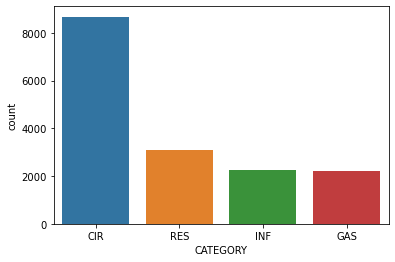

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(cate.CATEGORY)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


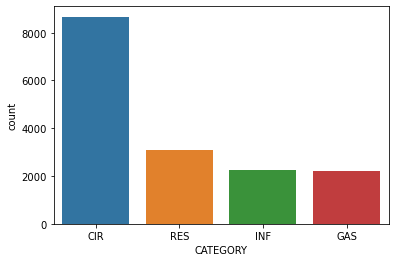

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(cate.CATEGORY)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


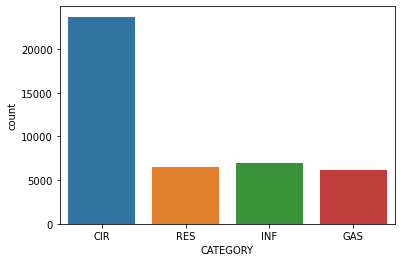

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.CATEGORY)
plt.show()

In [40]:
df.CATEGORY.value_counts()

CIR    23720
INF     7007
RES     6561
GAS     6134
Name: CATEGORY, dtype: int64

In [39]:
sns.factor(df.CATEGORY)

AttributeError: module 'seaborn' has no attribute 'factor'